In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split as tts


In [3]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from numpy import array
from time import time
import numpy as np
import pandas as pd
import keras.backend as K
import matplotlib.pyplot as plt

#C:\Users\Deya\Anaconda3\etc\conda\activate.d>set "KERAS_BACKEND=tensorflow"


C:\Users\Deya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import tensorflow as tf

In [5]:
#df = pd.read_csv(r'C:\Users\Srile_000\Desktop\Arunava_Sir_Project\Satisfaction.csv')
df = pd.read_csv('F:\yes.csv')

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df["Gender"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")
print()

#print(f"Encoded fitness values for first 10 entries: {gender_encoded[:10]}")

satisfaction_v2_encoded = encoder.fit_transform(df["satisfaction_v2"])
for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")
print()
ctype_encoded = encoder.fit_transform(df["Customer Type"])
for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")
print()
traveltype_encoded = encoder.fit_transform(df["Type of Travel"])
for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")
print()
class_encoded = encoder.fit_transform(df["Class"])
for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")




class id 0 has label Female
class id 1 has label Male

class id 0 has label neutral or dissatisfied
class id 1 has label satisfied

class id 0 has label Loyal Customer
class id 1 has label disloyal Customer

class id 0 has label Business travel
class id 1 has label Personal Travel

class id 0 has label Business
class id 1 has label Eco
class id 2 has label Eco Plus


In [7]:
del df['Gender']
del df['id']
del df['satisfaction_v2']
del df['Customer Type']
del df['Type of Travel']
del df['Class']

df['Gender']=gender_encoded
df['Customer Type']=ctype_encoded
df['Travel Type']=traveltype_encoded
df['Class']=class_encoded

#satisfaction_v2_encoded

In [8]:
df['Outcome']=satisfaction_v2_encoded

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
Age                                  129880 non-null int64
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64
Ease of Online booking               129880 non-null int64
On-board service                     129880 non-null int64
Leg room service                     129880 non-null int64
Baggage handling                     129880 non-null int64
Checkin service                      129880 non-null int64
Cleanliness                          129880 non-null int64
Onli

In [10]:
original_train_df, test_df = tts(df, test_size=0.2)


train_df = original_train_df.copy()
#del test_df['Outcome']
#train_df['Outcome']=satisfaction_v2_encoded[:103904]

In [11]:
column_names = train_df.columns.tolist()
column_names

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender',
 'Customer Type',
 'Travel Type',
 'Class',
 'Outcome']

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 68478 to 26949
Data columns (total 23 columns):
Age                                  103904 non-null int64
Flight Distance                      103904 non-null int64
Seat comfort                         103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Food and drink                       103904 non-null int64
Gate location                        103904 non-null int64
Inflight wifi service                103904 non-null int64
Inflight entertainment               103904 non-null int64
Online support                       103904 non-null int64
Ease of Online booking               103904 non-null int64
On-board service                     103904 non-null int64
Leg room service                     103904 non-null int64
Baggage handling                     103904 non-null int64
Checkin service                      103904 non-null int64
Cleanliness                          103904 non-null int64
O

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 75669 to 42325
Data columns (total 23 columns):
Age                                  25976 non-null int64
Flight Distance                      25976 non-null int64
Seat comfort                         25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Food and drink                       25976 non-null int64
Gate location                        25976 non-null int64
Inflight wifi service                25976 non-null int64
Inflight entertainment               25976 non-null int64
Online support                       25976 non-null int64
Ease of Online booking               25976 non-null int64
On-board service                     25976 non-null int64
Leg room service                     25976 non-null int64
Baggage handling                     25976 non-null int64
Checkin service                      25976 non-null int64
Cleanliness                          25976 non-null int64
Online boarding  

In [14]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Travel Type,Class,Outcome
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,...,3.340807,3.705759,3.352587,14.713713,15.091129,0.492616,0.183092,0.309416,0.593864,0.547328
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,...,1.260582,1.151774,1.298715,38.071126,38.465650,0.499947,0.386743,0.462255,0.621378,0.497757
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [15]:
train_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Travel Type,Class,Outcome
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103586.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.376809,1980.972869,2.837090,2.991511,2.849563,2.990318,3.250164,3.380332,3.518373,3.473216,...,3.339130,3.706498,3.352614,14.718490,15.098034,0.493359,0.184122,0.308881,0.594481,0.545994
std,15.119149,1026.277057,1.392803,1.527280,1.443872,1.305077,1.318563,1.347891,1.305993,1.304248,...,1.261171,1.150936,1.297988,37.952512,38.415396,0.499958,0.387585,0.462034,0.621242,0.497882
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1360.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,85.000000,6907.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [16]:
#missing values
train_df["Arrival Delay in Minutes"].replace(0, np.nan, inplace=True)
arrival_median=train_df["Arrival Delay in Minutes"].median()
train_df["Arrival Delay in Minutes"].fillna(arrival_median, inplace=True)

In [17]:
train_X = train_df.values[1:,0:22]
train_y = train_df.values[1:,22]

test_X = test_df.values[1:,0:22]
test_y = test_df.values[1:,22]

In [18]:
train_y.shape

(103903,)

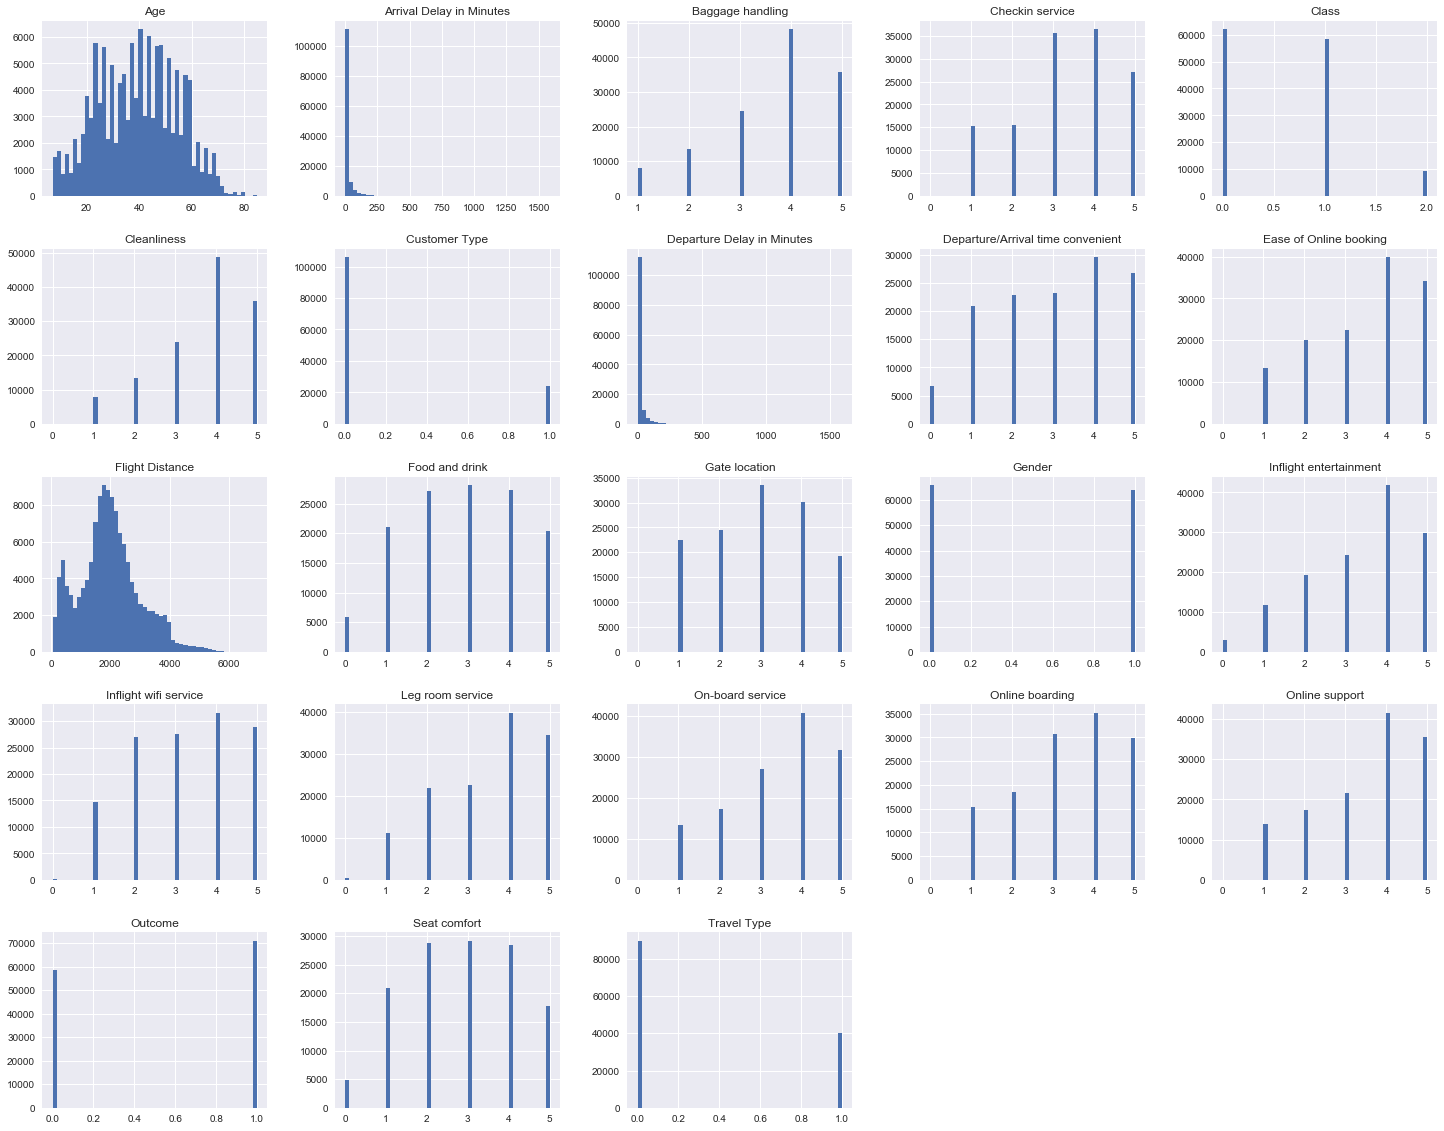

In [19]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [20]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
#Drop Marked Features
# Drop features 
to_drop=to_drop[:8]
to_drop

['Food and drink',
 'Gate location',
 'Online support',
 'Ease of Online booking',
 'Baggage handling',
 'Cleanliness',
 'Online boarding',
 'Arrival Delay in Minutes']

In [21]:
df_=df.copy()
del df_['Food and drink']
del df_['Gate location']
del df_['Flight Distance']
del df_['Departure/Arrival time convenient']
del df_['Baggage handling']
del df_['Departure Delay in Minutes']
del df_['Online boarding']
del df_['Arrival Delay in Minutes']

In [22]:
new_train_df, new_test_df = tts(df_, test_size=0.2)
#train_df = original_train_df.copy()
del new_test_df['Outcome']
new_train_df.info()
#new_train_df['Outcome']=satisfaction_v2_encoded[:103904]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 114718 to 12242
Data columns (total 15 columns):
Age                       103904 non-null int64
Seat comfort              103904 non-null int64
Inflight wifi service     103904 non-null int64
Inflight entertainment    103904 non-null int64
Online support            103904 non-null int64
Ease of Online booking    103904 non-null int64
On-board service          103904 non-null int64
Leg room service          103904 non-null int64
Checkin service           103904 non-null int64
Cleanliness               103904 non-null int64
Gender                    103904 non-null int64
Customer Type             103904 non-null int64
Travel Type               103904 non-null int64
Class                     103904 non-null int64
Outcome                   103904 non-null int64
dtypes: int64(15)
memory usage: 12.7 MB


In [23]:
correlation_matrix = new_train_df.corr(method='pearson')

#print(correlation_matrix)
#np.delete(correlation_matrix, 1, 1)
correlation_matrix

,Age,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Checkin service,Cleanliness,Gender,Customer Type,Travel Type,Class,Outcome
Age,1.000000,0.007253,0.014445,0.129046,0.121875,0.074076,0.069062,0.087436,0.029487,-0.018491,0.005338,-0.283561,-0.047044,-0.118292,0.119627
Seat comfort,0.007253,1.000000,0.128772,0.426640,0.119260,0.211625,0.120656,0.135329,0.042640,0.107340,-0.070539,-0.041652,0.014452,0.035949,0.243246
Inflight wifi service,0.014445,0.128772,1.000000,0.253935,0.556633,0.600250,0.061596,0.034341,0.093497,0.039632,-0.032022,-0.074893,-0.018666,-0.056711,0.227399
Inflight entertainment,0.129046,0.426640,0.253935,1.000000,0.440354,0.320284,0.183939,0.158968,0.223424,0.107450,-0.141076,-0.233255,-0.082900,-0.224008,0.524584
Online support,0.121875,0.119260,0.556633,0.440354,1.000000,0.616123,0.159264,0.136909,0.205233,0.097485,-0.091133,-0.188095,-0.039770,-0.167297,0.390363
Ease of Online booking,0.074076,0.211625,0.600250,0.320284,0.616123,1.000000,0.437190,0.356015,0.138606,0.418705,-0.082925,-0.152399,-0.026612,-0.122635,0.432077
On-board service,0.069062,0.120656,0.061596,0.183939,0.159264,0.437190,1.000000,0.413069,0.252071,0.552513,-0.057568,-0.087553,0.033636,-0.165621,0.354514
Leg room service,0.087436,0.135329,0.034341,0.158968,0.136909,0.356015,0.413069,1.000000,0.167373,0.411147,-0.068789,-0.099402,0.014225,-0.123760,0.304407
Checkin service,0.029487,0.042640,0.093497,0.223424,0.205233,0.138606,0.252071,0.167373,1.000000,0.241608,-0.018604,-0.042855,0.055127,-0.137865,0.266867
Cleanliness,-0.018491,0.107340,0.039632,0.107450,0.097485,0.418705,0.552513,0.411147,0.241608,1.000000,-0.017155,-0.003709,0.057150,-0.123562,0.260604


In [24]:
train_df.shape[0]-512

103392

In [25]:
# Random Sampling for Training, using mini-batches

import random
j=0

setOfNumbers = set()
while len(setOfNumbers) < 204:
    setOfNumbers.add(random.randint(1, 103992))
x = list(setOfNumbers)
    
for j in range(204): # 103992 / 512 = 203.109 => approx. 204, to cover all 103992(all mini batches included)
    #i=random.randrange(103992)
    i = x[j]
    batch_correlation_matrix = new_train_df[i:i+512].corr(method='pearson')
    print ("\nfor i value: ",i)
    #i+=512
    batch_num_v=0
    batch_num_h=0
    print (batch_correlation_matrix['Outcome'])
    for j in batch_correlation_matrix['Outcome']:
        if (j>=0.5):
            batch_num_v+=1;
        else:
            batch_num_h+=1;
    print (batch_num_v, batch_num_h)
    print ("\n")



for i value:  93184
Age                       0.073162
Seat comfort              0.210043
Inflight wifi service     0.165201
Inflight entertainment    0.441644
Online support            0.384487
Ease of Online booking    0.424781
On-board service          0.352367
Leg room service          0.348121
Checkin service           0.231192
Cleanliness               0.285051
Gender                   -0.276654
Customer Type            -0.242761
Travel Type              -0.093337
Class                    -0.238627
Outcome                   1.000000
Name: Outcome, dtype: float64
1 14



for i value:  69120
Age                       0.170983
Seat comfort              0.193487
Inflight wifi service     0.221267
Inflight entertainment    0.575102
Online support            0.373841
Ease of Online booking    0.390144
On-board service          0.313315
Leg room service          0.304172
Checkin service           0.315814
Cleanliness               0.223947
Gender                   -0.183318
Customer Ty

Age                       0.139517
Seat comfort              0.224422
Inflight wifi service     0.226199
Inflight entertainment    0.546109
Online support            0.403713
Ease of Online booking    0.379254
On-board service          0.322929
Leg room service          0.281908
Checkin service           0.312179
Cleanliness               0.291670
Gender                   -0.220780
Customer Type            -0.321018
Travel Type              -0.094477
Class                    -0.303625
Outcome                   1.000000
Name: Outcome, dtype: float64
2 13



for i value:  39495
Age                       0.105048
Seat comfort              0.235260
Inflight wifi service     0.297425
Inflight entertainment    0.538058
Online support            0.419577
Ease of Online booking    0.448379
On-board service          0.426833
Leg room service          0.344019
Checkin service           0.242425
Cleanliness               0.318482
Gender                   -0.156255
Customer Type            -0.2779



for i value:  49382
Age                       0.064085
Seat comfort              0.278900
Inflight wifi service     0.202589
Inflight entertainment    0.554364
Online support            0.425972
Ease of Online booking    0.441837
On-board service          0.336128
Leg room service          0.282807
Checkin service           0.230336
Cleanliness               0.280531
Gender                   -0.256067
Customer Type            -0.275390
Travel Type              -0.109856
Class                    -0.190224
Outcome                   1.000000
Name: Outcome, dtype: float64
2 13



for i value:  41702
Age                       0.057027
Seat comfort              0.177173
Inflight wifi service     0.173320
Inflight entertainment    0.436750
Online support            0.298484
Ease of Online booking    0.383905
On-board service          0.359267
Leg room service          0.310112
Checkin service           0.275682
Cleanliness               0.268836
Gender                   -0.217505
Customer T

In [26]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [25]:
autocorr(np.array(df.values[:25]))

ValueError: object too deep for desired array

In [1]:
import statsmodels.api as sm
print(sm.graphics.tsa.acf(new_train_X, nlags=40))
sm.graphics.tsa.plot_acf(new_train_X, lags=40)
plt.show()


NameError: name 'sm' is not defined

In [27]:
#zz=np.array(new_train_df.columns)
#zz
#for col in zz:
print(np.correlate(new_train_df['Outcome'],new_train_df['Age']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Flight Distance']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Seat comfort']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Departure/Arrival time convenient']))
print('\n')
    
print(np.correlate(new_train_df['Outcome'],new_train_df['Age']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Inflight wifi service']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Inflight entertainment']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['On-board service']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Leg room service']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Gender']))
print('\n')
print(np.correlate(new_train_df['Outcome'],new_train_df['Checkin service']))
print('\n')

print(np.correlate(new_train_df['Outcome'],new_train_df['Departure Delay in Minutes']))
print('\n')

print(np.correlate(new_train_df['Outcome'],new_train_df['Customer Type']))
print('\n')

print(np.correlate(new_train_df['Outcome'],new_train_df['Travel Type']))
print('\n')

print(np.correlate(new_train_df['Outcome'],new_train_df['Class']))
print('\n')
#AGE, FLIGHT DISTANCE, DEPARTURE ARRIVAL TIME CONVENIENT - THESE HAVE HIGHEST
#CORRELATION. SHOULD WE DROP THESE OR NOT? IF YES THEN MODIFY NEW_TRAIN_DF CODE TO 
#DEL THESE COLUMNS ALSO AND RETRAIN RBM

[2339399]




KeyError: 'Flight Distance'

In [29]:
#BATCH WISE CORRELATION MATRIX TO FIND NUM HIDDEN
import random
j=0
#print(random.randint(0,9))
for j in range(20): #MAKE THIS FOR I IN RANDOM
    i=random.randrange(103992)
    batch_correlation_matrix = new_train_df[i:i+512].corr(method='pearson')
    print ("\nfor i value: ",i)
    i+=512
    batch_num_v=0
    batch_num_h=0
    print (batch_correlation_matrix['Outcome'])
    for j in batch_correlation_matrix['Outcome']:
        if (j>=0.5):
            batch_num_v+=1;
        else:
            batch_num_h+=1;
    print (batch_num_v, batch_num_h)
    print ("\n")



for i value:  83550
Age                       0.153356
Seat comfort              0.198660
Inflight wifi service     0.250050
Inflight entertainment    0.486284
Online support            0.364913
Ease of Online booking    0.445489
On-board service          0.349830
Leg room service          0.262697
Checkin service           0.290501
Cleanliness               0.257018
Gender                   -0.229483
Customer Type            -0.279471
Travel Type              -0.163162
Class                    -0.280416
Outcome                   1.000000
Name: Outcome, dtype: float64
1 14



for i value:  58709
Age                       0.166342
Seat comfort              0.352170
Inflight wifi service     0.208426
Inflight entertainment    0.522400
Online support            0.416141
Ease of Online booking    0.455825
On-board service          0.359308
Leg room service          0.352029
Checkin service           0.297129
Cleanliness               0.305400
Gender                   -0.159034
Customer Ty

In [28]:
num_v=0
num_h=0
for i in correlation_matrix['Outcome']:
    if (i>=0.5):
        num_v+=1;
    else:
        num_h+=1;
print (num_v, num_h)

2 13


In [29]:
new_train_X = new_train_df.values[1:,0:14]
new_train_y = new_train_df.values[1:,14]

new_test_X = new_test_df.values[1:,0:14]
new_test_y = new_test_df.values[1:,13]

In [30]:
new_train_y.shape

(103903,)

In [31]:
#NOT THESE. THESE ARE PREVIOUS MODELS. 

class RBM(object):
    def __init__(self, visible_dim, hidden_dim, learning_rate, number_of_iterations):
        
        self._graph = tf.Graph()
        
        #Initialize graph
        with self._graph.as_default():
            
            self._num_iter = number_of_iterations
            self._visible_biases = tf.Variable(tf.random_uniform([1, visible_dim], 0, 1, name = "visible_biases"))
            self._hidden_biases = tf.Variable(tf.random_uniform([1, hidden_dim], 0, 1, name = "hidden_biases"))
            self._hidden_states = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name = "hidden_biases"))
            self._visible_cdstates = tf.Variable(tf.zeros([1, visible_dim], tf.float32, name = "visible_biases"))
            self._hidden_cdstates = tf.Variable(tf.zeros([1, hidden_dim], tf.float32, name = "hidden_biases"))
            self._weights = tf.Variable(tf.random_normal([visible_dim, hidden_dim], 0.01), name="weights")
            self._leraning_rate =  tf.Variable(tf.fill([visible_dim, hidden_dim], learning_rate), name = "learning_rate")
            
            self._input_sample = tf.placeholder(tf.float32, [visible_dim], name = "input_sample")
            
            # Gibbs Sampling
            input_matrix = tf.transpose(tf.stack([self._input_sample for i in range(hidden_dim)]))
            _hidden_probabilities = tf.sigmoid(tf.add(tf.multiply(input_matrix, self._weights), tf.stack([self._hidden_biases[0] for i in range(visible_dim)])))
            self._hidden_states = self.callculate_state(_hidden_probabilities)
            _visible_probabilities = tf.sigmoid(tf.add(tf.multiply(self._hidden_states, self._weights), tf.transpose(tf.stack([self._visible_biases[0] for i in range(hidden_dim)]))))
            self._visible_cdstates = self.callculate_state(_visible_probabilities)
            self._hidden_cdstates = self.callculate_state(tf.sigmoid(tf.multiply(self._visible_cdstates, self._weights) + self._hidden_biases))
            
            #CD
            positive_gradient_matrix = tf.multiply(input_matrix, self._hidden_states)
            negative_gradient_matrix = tf.multiply(self._visible_cdstates, self._hidden_cdstates)
            
            new_weights = self._weights
            new_weights.assign_add(tf.multiply(positive_gradient_matrix, self._leraning_rate))
            new_weights.assign_sub(tf.multiply(negative_gradient_matrix, self._leraning_rate))

            self._training = tf.assign(self._weights, new_weights) 
            
            #Initilize session and run it
            self._sess = tf.Session()
            initialization = tf.global_variables_initializer()
            self._sess.run(initialization)
        
    def train(self, input_vects):
        for iter_no in range(self._num_iter):
            for input_vect in input_vects:
                self._sess.run(self._training,
                               feed_dict={self._input_sample: input_vect})
    
    def callculate_state(self, probability):
        return tf.floor(probability + tf.random_uniform(tf.shape(probability), 0, 1))
       

In [59]:
#NOT THESE. THESE ARE PREVIOUS MODELS. SEE MODEL BELOW
from __future__ import print_function
import numpy as np

class RBM:
  
  def __init__(self, num_visible, num_hidden):
    self.num_hidden = num_hidden
    self.num_visible = num_visible
    self.debug_print = True

    # Initialize a weight matrix, of dimensions (num_visible x num_hidden), using
    # a uniform distribution between -sqrt(6. / (num_hidden + num_visible))
    # and sqrt(6. / (num_hidden + num_visible)). One could vary the 
    # standard deviation by multiplying the interval with appropriate value.
    # Here we initialize the weights with mean 0 and standard deviation 0.1. 
    # Reference: Understanding the difficulty of training deep feedforward 
    # neural networks by Xavier Glorot and Yoshua Bengio
    np_rng = np.random.RandomState(1234)

    self.weights = np.asarray(np_rng.uniform(low=-0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                       	high=0.1 * np.sqrt(6. / (num_hidden + num_visible)),
                       	size=(num_visible, num_hidden)))


    # Insert weights for the bias units into the first row and first column.
    self.weights = np.insert(self.weights, 0, 0, axis = 0)
    self.weights = np.insert(self.weights, 0, 0, axis = 1)
    
    
    

  
  def train(self, data, max_epochs = 1000, learning_rate = 0.1):

        num_examples = data.shape[0]

    # Insert bias units of 1 into the first column.
        data = np.insert(data, 0, 1, axis = 1)

        for epoch in range(max_epochs):      
      # Clamp to the data and sample from the hidden units. 
      # (This is the "positive CD phase", aka the reality phase.)
            pos_hidden_activations = np.dot(data, self.weights)      
            pos_hidden_probs = self._logistic(pos_hidden_activations)
            pos_hidden_probs[:,0] = 1 # Fix the bias unit.
            pos_hidden_states = pos_hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
      # Note that we're using the activation *probabilities* of the hidden states, not the hidden states       
      # themselves, when computing associations. We could also use the states; see section 3 of Hinton's 
      # "A Practical Guide to Training Restricted Boltzmann Machines" for more.
            pos_associations = np.dot(data.T, pos_hidden_probs)

      # Reconstruct the visible units and sample again from the hidden units.
      # (This is the "negative CD phase", aka the daydreaming phase.)
            neg_visible_activations = np.dot(pos_hidden_states, self.weights.T)
            neg_visible_probs = self._logistic(neg_visible_activations)
            neg_visible_probs[:,0] = 1 # Fix the bias unit.
            neg_hidden_activations = np.dot(neg_visible_probs, self.weights)
            neg_hidden_probs = self._logistic(neg_hidden_activations)
      # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
      # themselves.
            neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

      # Update weights.
            self.weights += learning_rate * ((pos_associations - neg_associations) / num_examples)

            error = np.sum((data - neg_visible_probs) ** 2)
            if self.debug_print:
                print("Epoch %s: error is %s" % (epoch, error))

                
                
  
  def run_visible(self, data):
        num_examples = data.shape[0]
    
    # Create a matrix, where each row is to be the hidden units (plus a bias unit)
    # sampled from a training example.
        hidden_states = np.ones((num_examples, self.num_hidden + 1))
    
    # Insert bias units of 1 into the first column of data.
        data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the hidden units.
        hidden_activations = np.dot(data, self.weights)
    # Calculate the probabilities of turning the hidden units on.
        hidden_probs = self._logistic(hidden_activations)
    # Turn the hidden units on with their specified probabilities.
        hidden_states[:,:] = hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
    # Always fix the bias unit to 1.
    # hidden_states[:,0] = 1
  
    # Ignore the bias units.
        hidden_states = hidden_states[:,1:]
        return hidden_states
    
  # TODO: Remove the code duplication between this method and `run_visible`?
  def run_hidden(self, data):

        num_examples = data.shape[0]

    # Create a matrix, where each row is to be the visible units (plus a bias unit)
    # sampled from a training example.
        visible_states = np.ones((num_examples, self.num_visible + 1))

    # Insert bias units of 1 into the first column of data.
        data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the visible units.
        visible_activations = np.dot(data, self.weights.T)
    # Calculate the probabilities of turning the visible units on.
        visible_probs = self._logistic(visible_activations)
    # Turn the visible units on with their specified probabilities.
        visible_states[:,:] = visible_probs > np.random.rand(num_examples, self.num_visible + 1)
    # Always fix the bias unit to 1.
    # visible_states[:,0] = 1

    # Ignore the bias units.
        visible_states = visible_states[:,1:]
        return visible_states
  
  def _logistic(self, x):
        return 1.0 / (1 + np.exp(-x))

if __name__ == '__main__':
    r = RBM(num_visible = 22, num_hidden = 21)
    training_data = np.array(train_X)
    r.train(training_data, max_epochs = 10)
    print(r.weights)
    user = np.array(test_X)
    x=np.array(r.run_visible(user))
    print(x)


Epoch 0: error is 518177613622.5894
Epoch 1: error is 517983287111.4637
Epoch 2: error is 517983092973.18774
Epoch 3: error is 517983085224.62024


C:\Users\Deya\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: RuntimeWarning: overflow encountered in exp


Epoch 4: error is 517983083613.265
Epoch 5: error is 517983083035.3116
Epoch 6: error is 517983082798.51825
Epoch 7: error is 517983082694.5839
Epoch 8: error is 517983082646.53973
Epoch 9: error is 517983082623.39154
[[ 5.00000000e-02  4.94634872e-02 -1.74793534e-01  8.63045146e-03
   4.84923576e-02  4.84409162e-02  1.15128978e-02  5.13058307e-02
   5.79940652e-04  4.99288342e-02  4.68192329e-02 -4.68432536e-03
   4.97078747e-02 -1.76509924e-01  4.86402575e-02  4.84063501e-02
  -1.76636571e-01  4.64710971e-02  1.20699996e-02  4.89732595e-02
  -1.79246729e-01 -1.75241640e-01]
 [ 3.85047417e+01  3.83883416e+01 -1.27350896e-01  3.46414888e+01
   3.85241526e+01  3.85151428e+01  3.46260744e+01  3.84498722e+01
   3.47131426e+01  3.85210334e+01  3.85288990e+01  3.46855695e+01
   3.84968980e+01 -1.25280205e-01  3.85136039e+01  3.84719985e+01
  -1.34525917e-01  3.84999258e+01  3.45949870e+01  3.85186850e+01
  -9.36042897e-02 -1.47737894e-01]
 [ 1.98136703e+03  1.98097479e+03 -1.62301868e-01  1

C:\Users\Deya\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [34]:
#THIS ONE
import numpy 
from scipy import sparse as S
from matplotlib import pyplot as plt 
from scipy.sparse.csr import csr_matrix 
import pandas 

def normalize(x):
    V = x.copy()
    V -= x.min(axis=1).reshape(x.shape[0],1)
    V /= V.max(axis=1).reshape(x.shape[0],1)
    return V
    
def sigmoid(x):
    #return x*(x > 0)
    #return numpy.tanh(x)
    return 1.0/(1+numpy.exp(-x)) 

def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return numpy.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x

def leaky_relu(x, derivative=False, leakage = 0.01):
    """ Leaky Rectified Linear Unit """
    '''if derivative:
        # Return the partial derivation of the activation function
        return np.clip(signal > 0, leakage, 1.0)
    else:
        # Return the activation signal
        output = np.copy( signal )
        output[ output < 0 ] *= leakage
    return output'''
    y1 = ((x > 0) * x)                                                 
    y2 = ((x <= 0) * x * leakage)                                         
    leaky_r = y1 + y2 
    return leaky_r

class RBM():
    def __init__(self, n_visible=None, n_hidden=None, W=None, learning_rate = 0.01, weight_decay=1,cd_steps=1,momentum=0.5):
        if W == None:
            self.W =  numpy.random.uniform(-.1,0.1,(n_visible,  n_hidden)) / numpy.sqrt(n_visible + n_hidden)
            self.W = numpy.insert(self.W, 0, 0, axis = 1)
            self.W = numpy.insert(self.W, 0, 0, axis = 0)
        else:
            self.W=W 
        self.learning_rate = learning_rate 
        self.momentum = momentum
        self.last_change = 0
        self.last_update = 0
        self.cd_steps = cd_steps
        self.epoch = 0 
        self.weight_decay = weight_decay  
        self.Errors = []
         
            
    def fit(self, Input, max_epochs = 1, batch_size=100):  
        if isinstance(Input, S.csr_matrix):
            bias = S.csr_matrix(numpy.ones((Input.shape[0], 1))) 
            csr = S.hstack([bias, Input]).tocsr()
        else:
            csr = numpy.insert(Input, 0, 1, 1)
        for epoch in range(max_epochs): 
            idx = numpy.arange(csr.shape[0])
            numpy.random.shuffle(idx)
            idx = idx[:batch_size]  
                   
            self.V_state = csr[idx] 
            self.H_state = self.activate(self.V_state)
            pos_associations = self.V_state.T.dot(self.H_state) 
  
            for i in range(self.cd_steps):
              self.V_state = self.sample(self.H_state)  
              self.H_state = self.activate(self.V_state)
              
            neg_associations = self.V_state.T.dot(self.H_state) 
            self.V_state = self.sample(self.H_state) 
            
            # Update weights. 
            w_update = self.learning_rate * ((pos_associations - neg_associations) / batch_size) 
            total_change = numpy.sum(numpy.abs(w_update)) 
            self.W += self.momentum * self.last_change  + w_update
            self.W *= self.weight_decay 
            
            self.last_change = w_update
            
            RMSE = numpy.mean((csr[idx] - self.V_state)**2)**0.5
            self.Errors.append(RMSE)
            self.epoch += 1
            print ("Epoch %s: RMSE = %s; ||W||: %6.1f; Sum Update: %f" % (self.epoch, RMSE, numpy.sum(numpy.abs(self.W)), total_change)  )
        return self 
        
    def learning_curve(self):
        plt.ion()
        #plt.figure()
        plt.show()
        E = numpy.array(self.Errors)
        plt.plot(pandas.rolling_mean(E, 50)[50:])  
     
    def activate(self, X):
        if X.shape[1] != self.W.shape[0]:
            if isinstance(X, S.csr_matrix):
                bias = S.csr_matrix(numpy.ones((X.shape[0], 1))) 
                csr = S.hstack([bias, X]).tocsr()
            else:
                csr = numpy.insert(X, 0, 1, 1) 
        else:
            csr = X
        p = tanh(csr.dot(self.W)) # Use of activation function - 1
        p[:,0]  = 1.0 
        return p  
        
    def sample(self, H, addBias=True): 
        if H.shape[1] == self.W.shape[0]:
            if isinstance(H, S.csr_matrix):
                bias = S.csr_matrix(numpy.ones((H.shape[0], 1))) 
                csr = S.hstack([bias, H]).tocsr()
            else:
                csr = numpy.insert(H, 0, 1, 1)
        else:
            csr = H
        p = tanh(csr.dot(self.W.T)) # Use of activation function - 2
        p[:,0] = 1
        return p
"""      
if __name__=="__main__":
    data = numpy.random.uniform(0,1,(100,10))

    rbm.learning_curve() """
#rbm = RBM(14,13)
#rbm.fit(train_X,50)
r1 = RBM(14, 13)

# Next train the RBM layer using the "fit" method:
r1.fit(new_train_X, max_epochs=200)

# To find the accuracy  of the RBM model
#acc = r1.evaluate(new_test_X, new_test_y) 
# or r1.predict(), write down the code for these functions explicitly
#print(acc[1]*100)

# Call "activate" to get the output of a given layer
V = r1.activate(new_train_X)
print(V)
a=r1.W  #weights
print(a)

Epoch 1: RMSE = 10.677740323846905; ||W||:    4.6; Sum Update: 3.600819
Epoch 2: RMSE = 11.181110300854375; ||W||:   15.2; Sum Update: 9.458531
Epoch 3: RMSE = 11.322911675922136; ||W||:   29.6; Sum Update: 9.715470
Epoch 4: RMSE = 10.46354058368417; ||W||:   42.7; Sum Update: 8.337996
Epoch 5: RMSE = 10.484511725030572; ||W||:   55.3; Sum Update: 8.463924
Epoch 6: RMSE = 10.649803517953506; ||W||:   67.7; Sum Update: 8.130695
Epoch 7: RMSE = 10.253470161380955; ||W||:   79.7; Sum Update: 7.989136
Epoch 8: RMSE = 11.79271815210244; ||W||:   92.9; Sum Update: 9.248289
Epoch 9: RMSE = 10.62983655702242; ||W||:  105.9; Sum Update: 8.388813
Epoch 10: RMSE = 9.94049862107245; ||W||:  118.1; Sum Update: 7.925231
Epoch 11: RMSE = 10.719105963245543; ||W||:  130.5; Sum Update: 8.465142
Epoch 12: RMSE = 11.05138648762592; ||W||:  143.3; Sum Update: 8.616695
Epoch 13: RMSE = 10.729284561375735; ||W||:  156.0; Sum Update: 8.390236
Epoch 14: RMSE = 11.570919280885743; ||W||:  169.0; Sum Update: 8.

Epoch 123: RMSE = 10.900051695730626; ||W||: 1543.3; Sum Update: 8.320479
Epoch 124: RMSE = 10.71361727735836; ||W||: 1555.6; Sum Update: 8.180324
Epoch 125: RMSE = 10.972071370919458; ||W||: 1567.9; Sum Update: 8.274328
Epoch 126: RMSE = 10.525396379973254; ||W||: 1580.1; Sum Update: 8.110300
Epoch 127: RMSE = 10.948818214653356; ||W||: 1592.6; Sum Update: 8.545522
Epoch 128: RMSE = 10.586499565448289; ||W||: 1605.0; Sum Update: 8.152305
Epoch 129: RMSE = 10.710987813006295; ||W||: 1617.4; Sum Update: 8.346750
Epoch 130: RMSE = 11.024783034664305; ||W||: 1630.1; Sum Update: 8.515187
Epoch 131: RMSE = 11.190343244846167; ||W||: 1642.7; Sum Update: 8.434867
Epoch 132: RMSE = 11.353964657114833; ||W||: 1655.5; Sum Update: 8.613719
Epoch 133: RMSE = 10.796993037341428; ||W||: 1668.1; Sum Update: 8.229651
Epoch 134: RMSE = 10.621242051466727; ||W||: 1680.4; Sum Update: 8.256265
Epoch 135: RMSE = 10.934770859216032; ||W||: 1693.1; Sum Update: 8.619934
Epoch 136: RMSE = 10.600879813763948; |

In [ ]:
#1
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)
#2 This uses a one vs rest method :
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} level of satisfaction...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")
"""
Here the output is like this: 
Processing satisfied .. Test acc is ..
Processing dissatisfied .. Test acc is ..
Processing neutral.. Test acc is ..
"""
#3 LABEL POWERSET

# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


#KDE 

import matplotlib
#IMPORT MATPLOTLIB.PYPLOT AS PLT
%matplotlib inline
from collections import defaultdict
from time import time

functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=N_i)
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=N_i)
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 4, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(4):
    pdf = kde_funcs[i](x, x_grid, bandwidth=0.2)
    ax[i].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")



In [33]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('yes.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

C:\Users\Deya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [35]:
from pandas import Series
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt
from matplotlib import pyplot
# load data
#series = Series.from_csv('yes.csv')
# prepare data
#X = series.values
#X = X.astype('float32')
train_size = int(len(df_) * 0.50)
train, test = df_[0:train_size], df_[train_size:]
# walk-foward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U33') dtype('<U33') dtype('<U33')

In [40]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

# Replace values1 with unshuffled data, vaues2 with randomly shuffled row-wise data 
values1 = [1.346112,1.337432,1.246655]
values2 = [1.033836,1.082015,1.117323]

print(KL(values1, values2))


0.7752796240788413


In [36]:
df_.rolling(window=2).mean()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Departure Delay in Minutes,Gender,Customer Type,Travel Type,Class,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56.0,1364.5,0.0,0.0,1.0,3.0,3.5,2.0,3.5,155.0,0.5,0.0,1.0,0.5,1.0
2,31.0,2301.0,0.0,0.0,1.0,1.0,3.5,3.5,3.0,155.0,0.5,0.0,1.0,0.5,1.0
3,37.5,1380.5,0.0,0.0,2.5,2.0,2.0,1.5,4.0,0.0,0.0,0.0,1.0,1.0,1.0
4,65.0,488.5,0.0,0.0,3.5,3.5,1.5,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0
5,50.0,1124.0,0.0,0.0,3.0,1.5,3.5,2.0,4.5,0.0,0.5,0.0,1.0,1.0,1.0
6,48.0,1060.5,0.0,0.0,2.0,2.5,5.0,2.0,5.0,8.5,0.5,0.0,1.0,1.0,1.0
7,38.0,1019.5,0.0,0.0,2.0,2.5,4.0,1.5,5.0,8.5,0.5,0.0,1.0,1.0,1.0
8,33.0,942.5,0.0,0.0,3.5,1.5,3.5,1.5,5.0,0.0,0.5,0.0,1.0,0.5,1.0
9,39.0,814.5,0.0,0.0,3.5,1.5,3.0,2.0,4.0,15.0,0.5,0.0,1.0,0.5,1.0


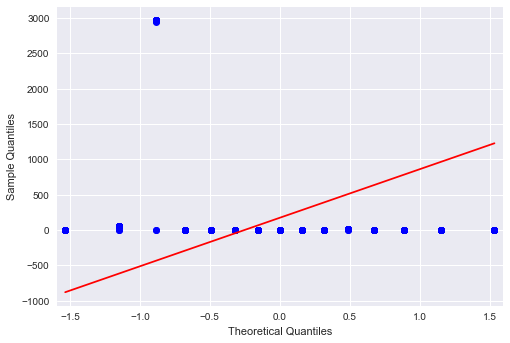

In [134]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = a
# q-q plot
qqplot(data, line='s')
pyplot.show()

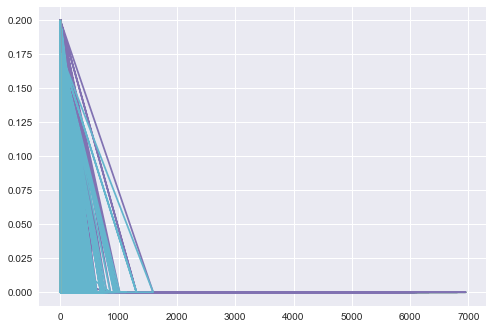

In [120]:
import matplotlib.pyplot as plt
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
dist_a = stats.norm.pdf(x_axis,0,2)
# Mean = 1, SD = 2
dist_b = stats.norm.pdf(x_axis,1,2)
plt.plot(x_axis, dist_a)
plt.plot(x_axis, dist_b)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
plt.show()

In [130]:
actual = np.array([0.4, 0.6]) # actual number of red and blue balls
model1 = np.array([0.2, 0.8]) # numbers we got above in 10 samples
model2 = np.array([0.35, 0.65]) # numbers we got above for 100 samples
kl1 = (model1 * np.log(model1/actual)).sum()
print("Model 1: ", kl1)
#Model 1: 0.0915162218494
kl2 = (model2 * np.log(model2/actual)).sum()
print("Model 2: ", kl2)
#Model 2: 0.00529177256922

Model 1:  0.09151622184943578
Model 2:  0.0052917725692158135


In [17]:
correlation_matrix["Outcome"].sort_values()

Customer Type                       -0.293226
Class                               -0.275635
Gender                              -0.213470
Travel Type                         -0.107615
Arrival Delay in Minutes            -0.081552
Departure Delay in Minutes          -0.075207
Flight Distance                     -0.040203
Departure/Arrival time convenient   -0.016123
Gate location                       -0.012349
Age                                  0.118000
Food and drink                       0.118946
Inflight wifi service                0.226333
Seat comfort                         0.240790
Cleanliness                          0.258588
Baggage handling                     0.258874
Checkin service                      0.266803
Leg room service                     0.303387
Online boarding                      0.337966
On-board service                     0.351000
Online support                       0.391181
Ease of Online booking               0.430684
Inflight entertainment            

In [18]:
#missing values
train_df["Arrival Delay in Minutes"].replace(0, np.nan, inplace=True)
arrival_median=train_df["Arrival Delay in Minutes"].median()
train_df["Arrival Delay in Minutes"].fillna(arrival_median, inplace=True)

In [22]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
train_df.Outcome.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Satisfaction, (1 = Satisfied)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Outcome, train_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Satisfaction by Age,  (1 = Satisfied)")

ax3 = plt.subplot2grid((2,3),(0,2))
train_df.Class.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_df.Class.value_counts()))
plt.title("Class")

plt.show()

<Figure size 432x288 with 0 Axes>

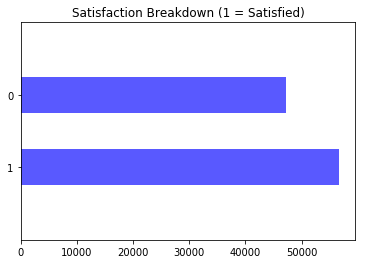

In [23]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train_df.Outcome.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train_df.Outcome.value_counts())) 
plt.title("Satisfaction Breakdown (1 = Satisfied)")
plt.show()

In [25]:
"""
train_X = train_df.values[:,:-1]
train_y = train_df.values[:,-1]
test_X = test_df.values[:,:-1]
test_y = test_df.values[:,-1]
#print(train_X.dtype.names)
np.set_printoptions(suppress=True)
test_X
"""
train_X = train_df.values[:,0:23]
train_y = train_df.values[:,-1]
#print(train_X.dtype.names)
np.set_printoptions(suppress=True)
train_y
test_X=test_df.values[:,0:23]
test_y=test_df.values[:,-1]

In [26]:
#np.isnan(train_X.any())
train_df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Travel Type', 'Class', 'Outcome'],
      dtype='object')

In [27]:
myX = df.iloc[:,0:23]  #independent columns
myy = df.iloc[:,-1]    #target column i.e price range
myX.shape

(129880, 23)

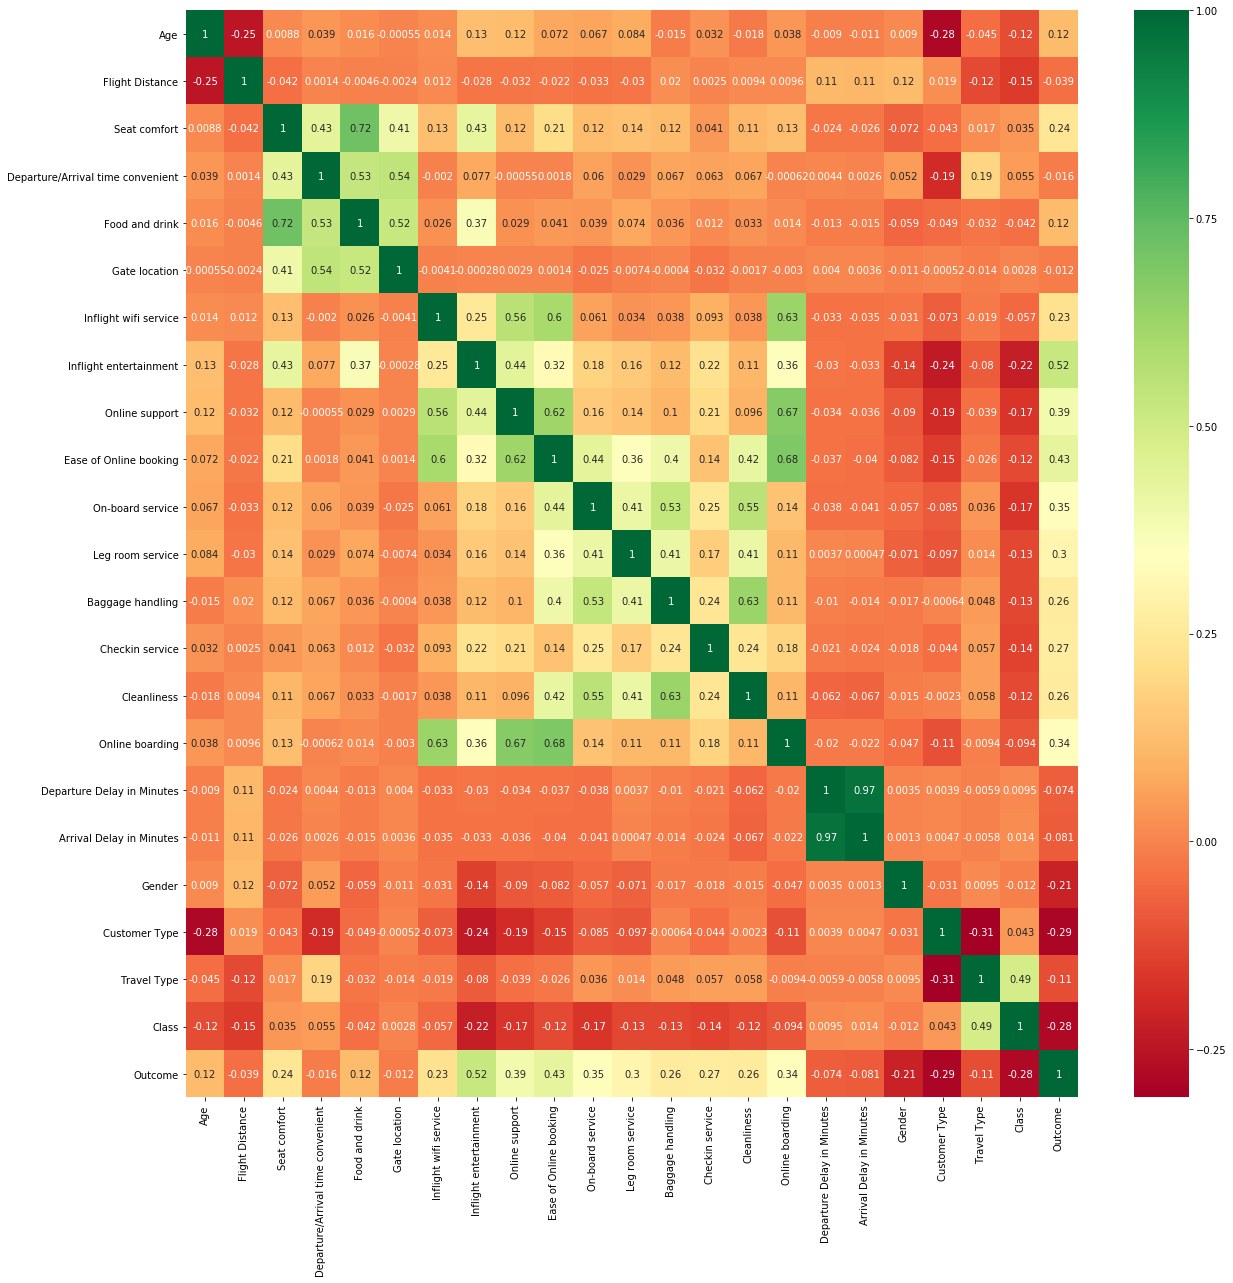

In [28]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [29]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
#dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(train_X, train_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\lo

[False False False False False False False False False False False False
 False False False False False False  True  True False False  True]
[17 21 12 10 13  4  5 11  9  6 16 14  8 18  7 15 20 19  1  1  3  2  1]


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 9151 to 59448
Data columns (total 23 columns):
Age                                  103904 non-null int64
Flight Distance                      103904 non-null int64
Seat comfort                         103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Food and drink                       103904 non-null int64
Gate location                        103904 non-null int64
Inflight wifi service                103904 non-null int64
Inflight entertainment               103904 non-null int64
Online support                       103904 non-null int64
Ease of Online booking               103904 non-null int64
On-board service                     103904 non-null int64
Leg room service                     103904 non-null int64
Baggage handling                     103904 non-null int64
Checkin service                      103904 non-null int64
Cleanliness                          103904 non-null int64
On

C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ 0.11932591  0.20661552  4.12705923  0.86729886  0.40591351  0.46532488
  0.56503475  7.15792598  2.42583451  1.13240089  0.59249534  0.92167811
  1.83875529  1.28457885  1.10541393  1.36649075  0.08491977  0.0880384
  2.84468493  3.27197412  1.69674492  2.83292516 64.59856639]


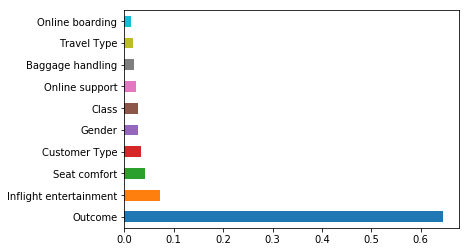

In [31]:
# Feature Importance
#from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
#dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(train_X, train_y)
# display the relative importance of each attribute
print(model.feature_importances_*100)

feat_importances = pd.Series(model.feature_importances_, index=train_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

s= StandardScaler()



temp2_df = train_df.copy()

temp2_df[column_names] = s.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()


"""
np.where(x.values >= np.finfo(np.float64).max)


s.fit(train_X)
train_X=s.transform(train_X)
test_X=s.transform(test_X)

pca.fit(train_X)
train_X=pca.transform(train_X)
test_X=pca.transform(test_X)

"""



C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


'\nnp.where(x.values >= np.finfo(np.float64).max)\n\n\ns.fit(train_X)\ntrain_X=s.transform(train_X)\ntest_X=s.transform(test_X)\n\npca.fit(train_X)\ntrain_X=pca.transform(train_X)\ntest_X=pca.transform(test_X)\n\n'

In [33]:
from numpy.random import seed
from keras.layers import Input, Dense
from keras.models import Model

ncol = 23
#print(satisfaction_v2_encoded)
target = df['Outcome']

In [34]:
X_train, X_test, Y_train, Y_test = tts(df, target, train_size = 0.9, random_state = seed(7))

C:\Users\Srile_000\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
encoding_dim = 12
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(2500, activation = 'relu')(input_dim)
encoded2 = Dense(1750, activation = 'relu')(encoded1)
encoded3 = Dense(1250, activation = 'relu')(encoded2)
encoded4 = Dense(750, activation = 'relu')(encoded3)
encoded5 = Dense(250, activation = 'relu')(encoded4)
encoded6 = Dense(50, activation = 'relu')(encoded5)
encoded7 = Dense(encoding_dim, activation = 'relu')(encoded6)

# Decoder Layers
decoded1 = Dense(50, activation = 'relu')(encoded7)
decoded2 = Dense(250, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1200, activation = 'relu')(decoded3)
decoded5 = Dense(1750, activation = 'relu')(decoded4)
decoded6 = Dense(2500, activation = 'relu')(decoded5)
decoded7 = Dense(ncol, activation = 'sigmoid')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              60000     
_________________________________________________________________
dense_2 (Dense)              (None, 1750)              4376750   
_________________________________________________________________
dense_3 (Dense)              (None, 1250)              2188750   
_________________________________________________________________
dense_4 (Dense)              (None, 750)               938250    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_6 (Dense)              (None, 50)                12550     
__________

In [36]:
autoencoder.fit(X_train, X_train, nb_epoch = 2, batch_size = 2048, shuffle = True, validation_data = (X_test, X_test))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 116892 samples, validate on 12988 samples
Epoch 1/2
116892/116892 [==============================] - 655s 6ms/step - loss: nan - acc: 0.0032 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/2
116892/116892 [==============================] - 641s 5ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [37]:
encoder = Model(inputs = input_dim, outputs = encoded7)
encoded_input = Input(shape = (encoding_dim, ))

In [ ]:
encoded_train = pd.DataFrame(encoder.predict(df))
encoded_train = encoded_train.add_prefix('feature_')

In [ ]:
encoded_train['target'] = target

In [ ]:
print(encoded_train.shape)
encoded_train.head()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)          #95 % of variance is retained
pc=pca.fit_transform(train_df)
new_df=pd.DataFrame(data=pc)
new_df.head()
#pc.explained_variance_ratio

In [ ]:
# performing preprocessing part 
#from sklearn.preprocessing import StandardScaler 

# importing or loading the dataset 
#dataset = pd.read_csv('wines.csv') 

# distributing the dataset into two components X and Y 
newX = df.iloc[:, 0:23].values 
newy = df.iloc[:, -1].values 

# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size = 0.2, random_state = 0) 

# performing preprocessing part 
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 14) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(.95)          #95 % of variance is retained
pc=pca.fit_transform(train_df)
new_df=pd.DataFrame(data=pc)
new_df.head()

In [ ]:
from keras.constraints import max_norm
def train():

    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)

    # load dataset
 #   dataframe = pd.read_csv("C:/Users/Srile_000/Desktop/Satisfaction_New.csv")
  #  dataset = dataframe.values
  #  np.random.shuffle(dataset)


    # split into input (X) and output (Y) variables
  #  X = dataset[1:,0:22]
   # Y = dataset[1:,22]

    # Clear the Session initiated by TensorBoard in every iteration of the main loop in Automation file
    #K.clear_session()
    
    # Create model - with DROPOUTs
    model = Sequential()
    # 13*46 = 598 neurons as input dimension, previously 512 was used, few features weren't taken(not an error, but all features to be included)!
    model.add(Dense(598, input_dim=23, kernel_initializer=initializers.RandomNormal(seed=seed), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer=initializers.RandomNormal(seed=seed), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, kernel_initializer=initializers.RandomNormal(seed=seed), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer=initializers.RandomNormal(seed=seed), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, kernel_initializer=initializers.RandomNormal(seed=seed), activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.9495, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    # Using TensorBoard to visualise the Model
    # ks=TensorBoard(log_dir="C:/Users/Srile_000/Desktop/logs/{}".format(time()), histogram_freq=1, write_graph=True, write_grads=True, batch_size=10)
      
    # Fit the model   
    #model.fit(X, Y, epochs = 16, batch_size=10, verbose = 2, validation_split=0.2, callbacks=[ks])
    #model.fit(X, Y, epochs = 8, batch_size=10, verbose = 2, validation_split=0.2, callbacks=[TrainValTensorBoard(write_graph=False)])
    model.fit(train_X, train_y, epochs = 8, batch_size=10, verbose = 2, validation_split=0.2)

    acc = model.evaluate(test_X, test_y, batch_size = 10, verbose = 0)
    # print(model.metrics_names) -> [loss, accuracy]
    print("\nLoss : %.2f" % (acc[0]))
    print("Train Accuracy : %.2f%%" % (acc[1]*100))

if __name__ == '__main__':
    train()


In [ ]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = train_df.Outcome[train_df.Gender == 1].value_counts().sort_index()
df_female = train_df.Outcome[train_df.Gender == 0].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Satisfaction with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Satisfaction proportionally with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

plt.show()

In [ ]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = train_df.Outcome[train_df.Gender == 0][train_df.Class != 2].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Satisfied", "Dissatisfied"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Satusfaction with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass =  train_df.Outcome[train_df.Gender == 0][train_df.Class == 2].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Satisfied", "Dissatisfied"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass =  train_df.Outcome[train_df.Gender == 1][train_df.Class == 2].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Satisfied", "Dissatisfied"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass =  train_df.Outcome[train_df.Gender == 1][train_df.Class != 2].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Satisfied", "Dissatisfied"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

In [ ]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
train_df.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
# plt.legend(loc='best')

In [ ]:
#ADABOOST AND SVM 
#THIS IS MATLAB CODE THO
"""
N = length(X); % X training labels
    W = 1/N * ones(N,1); %Weights initialization
    M = 10; % Number of boosting iterations 

    for m=1:M
        C = 10; %The cost parameters of the linear SVM, you can...
                 perform a grid search for the optimal value as well           

        %Calculate the error and alpha in adaBoost with cross validation
        cmd = ['-c ', num2str(C), ' -w ', num2str(W)];
        model = svmtrain(X, Y, cmd);
        [Xout, acc, ~] = svmpredict(X,Y,cmd);

        err = sum(.5 * W .* acc * N)/sum(W);
        alpha = log( (1-err)/err );

        % update the weight
        W = W.*exp( - alpha.*Xout.*X );
        W = W/norm(W);

    end
    """

In [ ]:
from numpy import *

def loadSimpleData():
    dataMat = matrix([[1., 2.1], [2., 1.1], [1.3, 1.], [1., 1.], [2., 1.]])
    labels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return dataMat, labels

def loadData(fileName):
    fr = open(fileName)
    dataSet = []
    labels = []
    return dataSet, labels

def stumpClassify(dataSet, dimen, threshVal, threshIneq):
    retArray = ones((shape(dataSet)[0], 1))
    if threshIneq == 'lt':
        retArray[dataSet[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataSet[:, dimen] > threshVal] = -1.0
    return retArray

def buildStump(dataArr, classLabels, D):
    dataSet = mat(dataArr); labels = mat(classLabels).T
    m,n = shape(dataSet)
    numSteps = 10.0; bestStump = {}; bestClasEst = mat(zeros((m, 1)))
    minError = inf
    for i in xrange(n):
        rangeMin = dataSet[:,i].min(); rangeMax = dataSet[:,i].max()
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in xrange(-1, int(numSteps) + 1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataSet, i, threshVal, inequal)
            errArr = mat(ones((m, 1)))
            errArr[predictedVals == labels] = 0
            weightedErr = D.T*errArr
	    #print "split: dim : %d, thresh : %.2f, thresh ineqal: %s,\n the weighted error is %0.3f"%(i, threshVal, inequal, weightedErr)
            if weightedErr < minError:
                minError = weightedErr
                bestClasEst = predictedVals.copy()
                bestStump['dim'] = i
                bestStump['thresh'] = threshVal
                bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst 

        
def adaBoostTrainDs(dataArr, labels, numIt = 40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1)) / m)
    aggClassEst = mat(zeros((m, 1)))
    for i in xrange(numIt):
        bestStump, error, classEst = buildStump(dataArr, labels, D)
        #print "D:",D.T
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        #print "ClassEst:",classEst.T
        expon = multiply(-1* alpha * mat(labels).T, classEst)
        D = multiply(D, exp(expon))
        D = D / D.sum()
        aggClassEst += alpha * classEst
        #print "aggClassEst:", aggClassEst.T
        aggErrors = multiply(sign(aggClassEst) != mat(labels).T, ones((m, 1)))
        errorRate = aggErrors.sum() / m
        #print "total error:", errorRate,'\n'
        if errorRate == 0.0:break
    return weakClassArr


if __name__ == '__main__':
    dataSet, labels =  loadSimpleData()
    D = mat(ones((5, 1)) / 5)
    print adaBoostTrainDs(dataSet, labels, 9)

In [ ]:
def selectJrand(i, m):
    j = i
    while (j == i):
        j = int(random.uniform(0, m))
    return j

def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataSet, labels, C, toler, maxIter = 100):
    b = 0; m, n = shape(dataSet)
    alphas = mat(zeros((m, 1)))
    iter = 0
    while(iter < maxIter):
        alphaPairsChanged = 0
        for i in xrange(m):
            fXi = float(multiply(alphas, labels).T * (dataSet * dataSet[i, :]. T)) + b
            Ei = fXi - labels[i]
            if ((labels[i] * Ei < toler) and (alphas[i] < C)) or (alphas[i] > 0):
                j = selectJrand(i, m)
                fXj = float(multiply(alphas, labels).T * (dataSet * dataSet[j, :].T)) + b
                Ej = fXj - labels[j]
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                if(labels[i] != labels[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L == H:
                    #print "L == H"
                    continue
                eta = 2.0 * dataSet[i,:] * dataSet[j, :].T - dataSet[j, :] * dataSet[j, :].T - dataSet[i, :] * dataSet[i, :].T
                if eta >= 0:
                    #print "eta >= 0"
                    continue
                alphas[j] -= labels[j] * (Ei - Ej) / eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    #print "j not moving enough"
                    continue
                alphas[i] += labels[j] * labels[i] * (alphaJold - alphas[j])
                b1 = b - Ei - labels[i] * (alphas[i] - alphaIold) * dataSet[i, :] * dataSet[i, :].T - \
                        labels[j] * (alphas[j] - alphaJold) * dataSet[i, :] * dataSet[j, :].T
                b2 = b - Ej - labels[i] * (alphas[i] - alphaIold) * dataSet[j, :] * dataSet[j, :].T - \
                        labels[j] * (alphas[j] - alphaJold) * dataSet[j, :] * dataSet[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2) / 2.0
                alphaPairsChanged += 1
                print "iter : %d i : %d, pairs changed %d"%(iter, i, alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print "iteration number : %d"%iter
    return b, alphas